In [3]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt 
dataset =load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

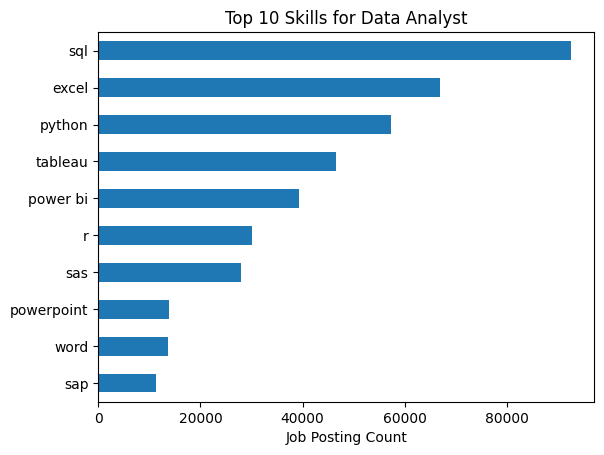

In [5]:
df_explode = df.explode('job_skills')
skill_count = df_explode.groupby(['job_title_short', 'job_skills']).size()
df_skill_counts = skill_count.reset_index(name='skill_count')
df_skill_counts = df_skill_counts.sort_values(by='skill_count', ascending=False)
job_title = 'Data Analyst'
job_count = 10
zxc = df_skill_counts[df_skill_counts['job_title_short']== job_title].head(job_count)
zxc.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title('Top 10 Skills for Data Analyst')
plt.xlabel('Job Posting Count')
plt.ylabel("")
plt.legend().set_visible(False)